In [1]:
#import the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr
from scipy import signal
from scipy.signal import correlate

In [2]:
import os
import sys

In [3]:
#import the datasets
file_path = './dataset/inputs/'

arvi = pd.read_csv(file_path + "arvi_hhm.csv")
temperature = pd.read_csv(file_path + "temp_hhm.csv")
precipitation = pd.read_csv(file_path + "precip_hhm.csv")
shortwave = pd.read_csv(file_path + "shortwave_hhm.csv")

In [4]:
arvi 

,system:time_start,ARVI
0,"Jan 7, 2018",1.017
1,"Jan 12, 2018",1.026
2,"Jan 14, 2018",1.325
3,"Jan 24, 2018",0.924
4,"Jan 27, 2018",0.999
...,...,...
512,"Jun 20, 2020",0.212
513,"Jun 20, 2020",0.792
514,"Jun 22, 2020",0.531
515,"Jun 25, 2020",0.591


In [5]:
sys.path.append(os.path.join(os.path.dirname('__file__'), 'utils'))

In [6]:
#functions to use after
months = {
    1: {"name":"Jan", "end":31},
    2: {"name":"Feb", "end":28},
    3: {"name":"Mar", "end":31},
    4: {"name":"Apr", "end":30},
    5: {"name":"May", "end":31},
    6: {"name":"June", "end":30},
    7: {"name":"Jul", "end":31},
    8: {"name":"Aug", "end":31},
    9: {"name":"Sep", "end":30},
    10: {"name":"Oct", "end":31},
    11: {"name":"Nov", "end":30},
    12: {"name":"Dec", "end":31},
}
from datetime import datetime

def str_to_float(num_str):
    try:
        nums = num_str.split(",")
        if len(nums) >= 2:
            val = float("".join(nums))
        else:
            val = float(num_str)
        return val
    except Exception as e:
        return "No"
        print(e)
        
def formatStarter(day):
    if day < 10:
        return "0" + str(day)
    return str(day)

def set_end_intevals(starter, endPos, date, month_number):
    
    if date.day < endPos and date.month == month_number:
        #return formatStarter(starter) + " - " + str(endPos) + " " + months[month_number]["name"] + " " + str(date.year)
        return datetime(date.year, date.month, endPos).date()
    elif date.day > endPos and date.month == month_number:
         return datetime(date.year, date.month, endPos+1).date()
        
#return formatStarter(endPos+1) + " - " + str(months[month_number]["end"]) + " "+ months[month_number]["name"] + " " + str(date.year)
    

def rename_intervals(starter, endPos, date, month_number):
    if date.day == endPos and date.month == month_number:
        return formatStarter(starter) + " - " + str(endPos) + " " + months[month_number]["name"] + " " + str(date.year)
    elif date.day > endPos and date.month == month_number:
        return formatStarter(endPos+1) + " - " + str(months[month_number]["end"]) + " "+ months[month_number]["name"] + " " + str(date.year)

In [7]:
#data checking
arvi.head()

,system:time_start,ARVI
0,"Jan 7, 2018",1.017
1,"Jan 12, 2018",1.026
2,"Jan 14, 2018",1.325
3,"Jan 24, 2018",0.924
4,"Jan 27, 2018",0.999


In [8]:
#data checking
temperature.head()

,system:time_start,mean_2m_air_temperature
0,"Jan 1, 2018",25.990
1,"Jan 2, 2018",25.719
2,"Jan 3, 2018",25.241
3,"Jan 4, 2018",24.284
4,"Jan 5, 2018",24.246


In [9]:
#data checking
precipitation.head()

,system:time_start,total_precipitation
0,"Jan 1, 2018",0.039
1,"Jan 2, 2018",0.329
2,"Jan 3, 2018",5.943
3,"Jan 4, 2018",41.536
4,"Jan 5, 2018",18.311


In [10]:
#data checking
shortwave.head()

,system:time_start,surface_solar_radiation_downwards
0,"Jan 1, 2018","5,221,649.833"
1,"Jan 2, 2018","4,335,803.333"
2,"Jan 3, 2018","2,117,488.5"
3,"Jan 4, 2018","1,309,567.667"
4,"Jan 5, 2018","2,322,941.5"


In [11]:
#data checking
arvi.tail()

,system:time_start,ARVI
512,"Jun 20, 2020",0.212
513,"Jun 20, 2020",0.792
514,"Jun 22, 2020",0.531
515,"Jun 25, 2020",0.591
516,"Jun 25, 2020",0.776


In [12]:
#data checking
temperature.tail()

,system:time_start,mean_2m_air_temperature
906,"Jun 25, 2020",28.336
907,"Jun 26, 2020",28.237
908,"Jun 27, 2020",28.503
909,"Jun 28, 2020",28.425
910,"Jun 29, 2020",27.993


In [13]:
#data checking
precipitation.tail()

,system:time_start,total_precipitation
906,"Jun 25, 2020",1.174
907,"Jun 26, 2020",0.187
908,"Jun 27, 2020",0.190
909,"Jun 28, 2020",0.254
910,"Jun 29, 2020",0.740


In [14]:
#data checking
shortwave.tail()

,system:time_start,surface_solar_radiation_downwards
906,"Jun 25, 2020","7,811,999.333"
907,"Jun 26, 2020","7,865,486.667"
908,"Jun 27, 2020","7,910,742.083"
909,"Jun 28, 2020","7,899,381"
910,"Jun 29, 2020","7,915,035.833"


In [15]:
#Rename the different columns

In [16]:
arvi.columns = ['date','ARVI']

In [17]:
temperature.columns = ['date','Temperature']

In [18]:
precipitation.columns = ['date','Precipitation']

In [19]:
shortwave.columns = ['date','Shortwave']

In [20]:
arvi_df= arvi.copy()

In [21]:
temperature_df= temperature.copy()

In [22]:
precipitation_df= precipitation.copy()

In [23]:
shortwave_df= shortwave.copy()

In [24]:
arvi_df= arvi_df.set_index('date')

In [25]:
temperature_df= temperature_df.set_index('date')

In [26]:
precipitation_df= precipitation_df.set_index('date')

In [27]:
shortwave_df= shortwave_df.set_index('date')

In [28]:
arvi.head()

,date,ARVI
0,"Jan 7, 2018",1.017
1,"Jan 12, 2018",1.026
2,"Jan 14, 2018",1.325
3,"Jan 24, 2018",0.924
4,"Jan 27, 2018",0.999


In [29]:
temperature.head()

,date,Temperature
0,"Jan 1, 2018",25.990
1,"Jan 2, 2018",25.719
2,"Jan 3, 2018",25.241
3,"Jan 4, 2018",24.284
4,"Jan 5, 2018",24.246


In [30]:
precipitation.head()

,date,Precipitation
0,"Jan 1, 2018",0.039
1,"Jan 2, 2018",0.329
2,"Jan 3, 2018",5.943
3,"Jan 4, 2018",41.536
4,"Jan 5, 2018",18.311


In [31]:
shortwave.head()

,date,Shortwave
0,"Jan 1, 2018","5,221,649.833"
1,"Jan 2, 2018","4,335,803.333"
2,"Jan 3, 2018","2,117,488.5"
3,"Jan 4, 2018","1,309,567.667"
4,"Jan 5, 2018","2,322,941.5"


In [32]:
arvi['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in arvi['date']]

In [33]:
temperature['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in temperature['date']]

In [34]:
precipitation['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in precipitation['date']]

In [35]:
shortwave['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in shortwave['date']]

In [36]:
arvi.date = arvi['date']

In [37]:
shortwave.date = shortwave['date']

In [38]:
arvi = arvi.sort_values(by="date")

In [39]:
shortwave = shortwave.sort_values(by="date")

In [40]:
arvi_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(arvi.date)]
arvi["date_intervals"] = arvi_dates_col
arvi.head()

,date,ARVI,date_intervals
0,2018-01-07,1.017,2018-01-16
1,2018-01-12,1.026,2018-01-16
2,2018-01-14,1.325,2018-01-16
3,2018-01-24,0.924,2018-01-17
4,2018-01-27,0.999,2018-01-17


In [41]:
shortwave_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(shortwave.date)]
shortwave["date_intervals"] = shortwave_dates_col
shortwave.head()

,date,Shortwave,date_intervals
0,2018-01-01,"5,221,649.833",2018-01-16
1,2018-01-02,"4,335,803.333",2018-01-16
2,2018-01-03,"2,117,488.5",2018-01-16
3,2018-01-04,"1,309,567.667",2018-01-16
4,2018-01-05,"2,322,941.5",2018-01-16


In [42]:
arvi_years = [d.year for d in  list(arvi.date)]
arvi["years"] =arvi_years

In [43]:
shortwave_years = [d.year for d in  list(shortwave.date)]
shortwave["years"] =shortwave_years

In [44]:
arvi.head()

,date,ARVI,date_intervals,years
0,2018-01-07,1.017,2018-01-16,2018
1,2018-01-12,1.026,2018-01-16,2018
2,2018-01-14,1.325,2018-01-16,2018
3,2018-01-24,0.924,2018-01-17,2018
4,2018-01-27,0.999,2018-01-17,2018


In [45]:
shortwave.head()

,date,Shortwave,date_intervals,years
0,2018-01-01,"5,221,649.833",2018-01-16,2018
1,2018-01-02,"4,335,803.333",2018-01-16,2018
2,2018-01-03,"2,117,488.5",2018-01-16,2018
3,2018-01-04,"1,309,567.667",2018-01-16,2018
4,2018-01-05,"2,322,941.5",2018-01-16,2018


In [46]:
arvi.shape

(517, 4)

In [47]:
shortwave.shape

(911, 4)

In [48]:
#arvi.ARVI=[str_to_float(num) for num in list(arvi.ARVI)]

In [49]:
shortwave.Shortwave=[str_to_float(num) for num in list(shortwave.Shortwave)]

In [50]:
arvi.head()

,date,ARVI,date_intervals,years
0,2018-01-07,1.017,2018-01-16,2018
1,2018-01-12,1.026,2018-01-16,2018
2,2018-01-14,1.325,2018-01-16,2018
3,2018-01-24,0.924,2018-01-17,2018
4,2018-01-27,0.999,2018-01-17,2018


In [51]:
shortwave.head()

,date,Shortwave,date_intervals,years
0,2018-01-01,5221649.833,2018-01-16,2018
1,2018-01-02,4335803.333,2018-01-16,2018
2,2018-01-03,2117488.500,2018-01-16,2018
3,2018-01-04,1309567.667,2018-01-16,2018
4,2018-01-05,2322941.500,2018-01-16,2018


In [52]:
grouped_arvi = arvi.groupby(["date_intervals"])[["ARVI"]].mean()
grouped_arvi = grouped_arvi.reset_index()

In [53]:
grouped_shortwave = shortwave.groupby(["date_intervals"])[["Shortwave"]].mean()
grouped_shortwave = grouped_shortwave.reset_index()

In [54]:
grouped_arvi.shape

(60, 2)

In [55]:
intervals = list(grouped_arvi["date_intervals"])
new_inter = []

for d in intervals:
   new_inter.append(rename_intervals(1, 16, d, d.month))

In [56]:
grouped_shortwave.shape

(60, 2)

In [57]:
intervals = list(grouped_shortwave["date_intervals"])
new_inter = []

for d in intervals:
   new_inter.append(rename_intervals(1, 16, d, d.month))

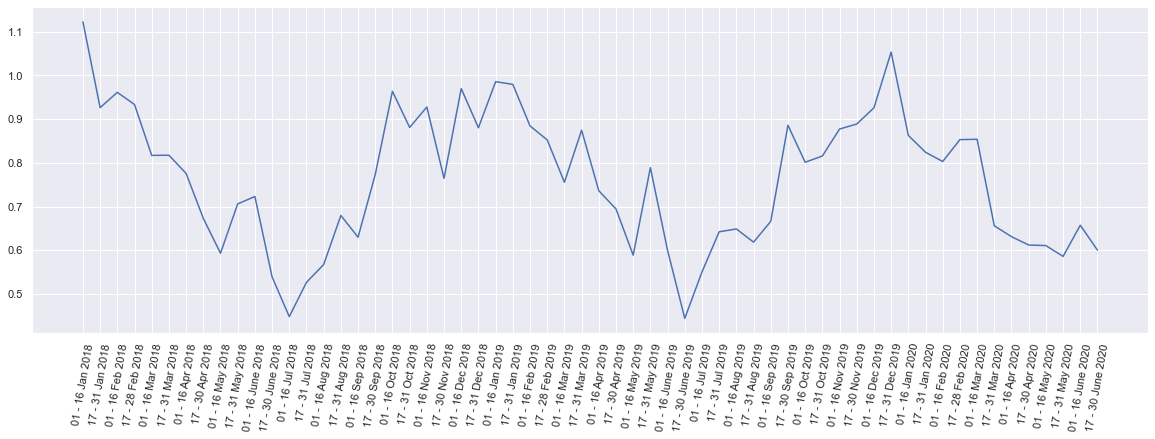

In [58]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_arvi["ARVI"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)
plt.savefig('arvi_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

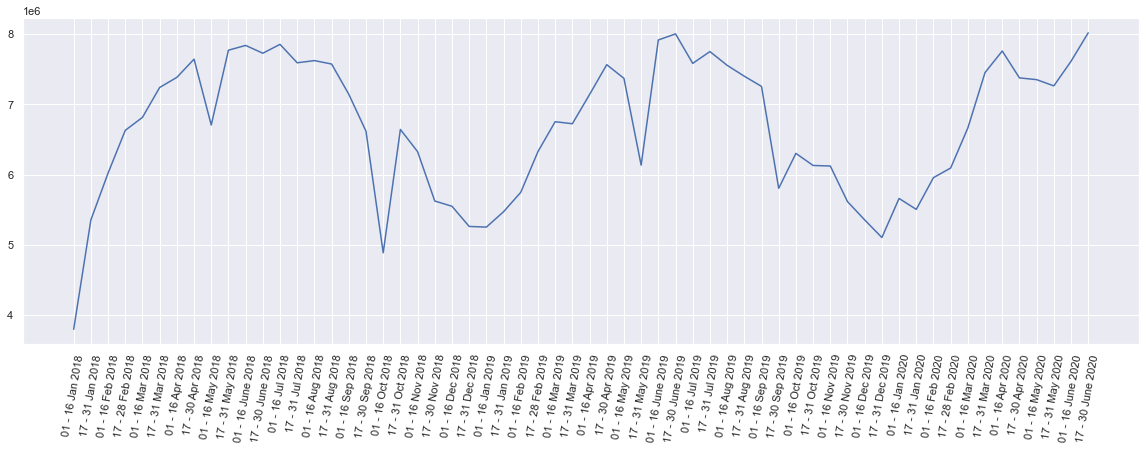

In [59]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_shortwave["Shortwave"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)
plt.savefig('shortwave_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

In [60]:
temperature.date = temperature['date']

In [61]:
temperature = temperature.sort_values(by="date")

In [62]:
temperature_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(temperature.date)]
temperature["date_intervals"] = temperature_dates_col
temperature.head()

,date,Temperature,date_intervals
0,2018-01-01,25.990,2018-01-16
1,2018-01-02,25.719,2018-01-16
2,2018-01-03,25.241,2018-01-16
3,2018-01-04,24.284,2018-01-16
4,2018-01-05,24.246,2018-01-16


In [63]:
temperature_years = [d.year for d in  list(temperature.date)]
temperature["years"] =temperature_years

In [64]:
temperature.head()

,date,Temperature,date_intervals,years
0,2018-01-01,25.990,2018-01-16,2018
1,2018-01-02,25.719,2018-01-16,2018
2,2018-01-03,25.241,2018-01-16,2018
3,2018-01-04,24.284,2018-01-16,2018
4,2018-01-05,24.246,2018-01-16,2018


In [65]:
temperature.shape

(911, 4)

In [66]:
grouped_temperature =temperature.groupby(["date_intervals"])[["Temperature"]].mean()
grouped_temperature = grouped_temperature.reset_index()

In [67]:
grouped_temperature.shape

(60, 2)

In [68]:
intervals = list(grouped_temperature["date_intervals"])
new_inter = []

for d in intervals:
   new_inter.append(rename_intervals(1, 16, d, d.month))

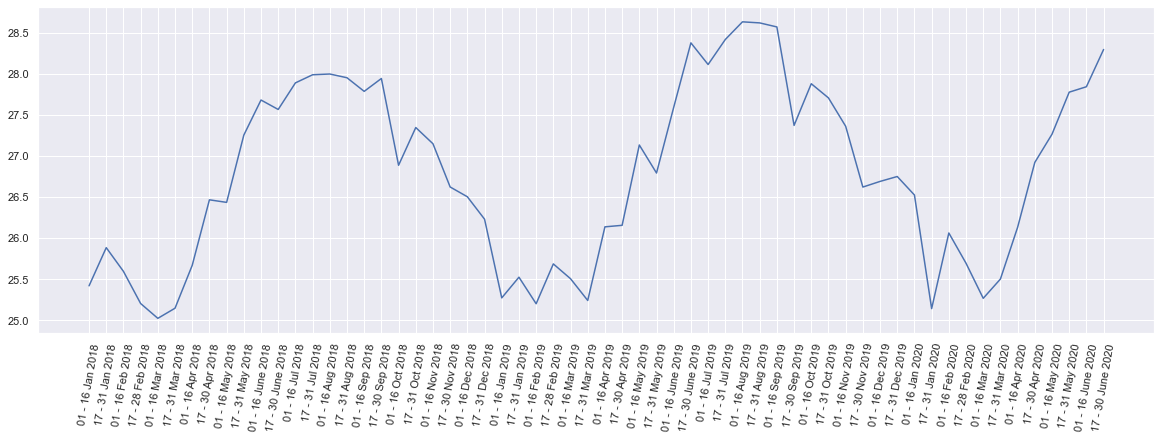

In [69]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_temperature["Temperature"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)
plt.savefig('temperature_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

In [70]:
precipitation.date = precipitation['date']

In [71]:
precipitation = precipitation.sort_values(by="date")

In [72]:
precipitation_dates_col = [set_end_intevals(1, 16, d, d.month)  for d in list(precipitation.date)]
precipitation["date_intervals"] = precipitation_dates_col
precipitation.head()

,date,Precipitation,date_intervals
0,2018-01-01,0.039,2018-01-16
1,2018-01-02,0.329,2018-01-16
2,2018-01-03,5.943,2018-01-16
3,2018-01-04,41.536,2018-01-16
4,2018-01-05,18.311,2018-01-16


In [73]:
precipitation_years = [d.year for d in  list(precipitation.date)]
precipitation["years"] = precipitation_years

In [74]:
precipitation.shape

(911, 4)

In [75]:
grouped_precipitation =precipitation.groupby(["date_intervals"])[["Precipitation"]].sum()
grouped_precipitation = grouped_precipitation.reset_index()

In [76]:
grouped_precipitation.shape

(60, 2)

In [77]:
intervals = list(grouped_precipitation["date_intervals"])
new_inter = []

for d in intervals:
   new_inter.append(rename_intervals(1, 16, d, d.month))

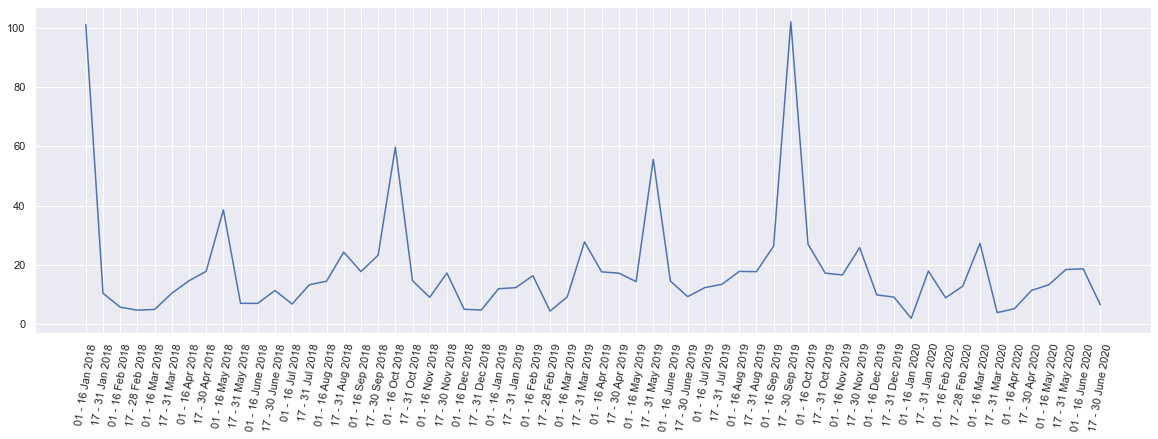

In [78]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(sharey=True, sharex=True)
x_pos = np.arange(len(new_inter))
_ = ax.plot(list(grouped_precipitation["Precipitation"]))
ax.set_xticks(x_pos)
rects = ax.set_xticklabels(x_pos)
_ = ax.set_xticklabels(new_inter,  rotation = 80)
plt.savefig('precipitation_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

In [79]:
df=grouped_temperature.merge(grouped_precipitation)

In [80]:
df.shape

(60, 3)

In [81]:
df.head()

,date_intervals,Temperature,Precipitation
0,2018-01-16,25.420467,101.022
1,2018-01-17,25.885800,10.441
2,2018-02-16,25.596733,5.737
3,2018-02-17,25.204833,4.729
4,2018-03-16,25.024267,4.971


In [82]:
# ------------- Plot the indexes ----------
#Initialize plot and parameters
sns.set(rc={'figure.figsize':(16,8)})
#sns.set_context('paper')

#Plot colors
prec_color = 'cornflowerblue'
temp_color = 'fuchsia'
short_color = 'red'

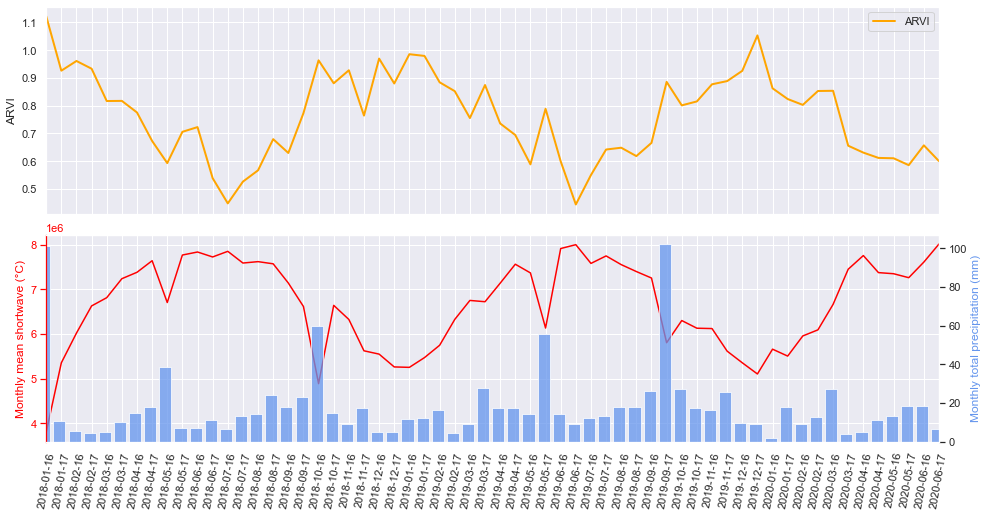

In [83]:
#Create the figure with a date x-axis
plt.style.use("tableau-colorblind10")
fig, [ax0, ax1] = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
#ax.set_xlim(dt.date(2017,12,1),dt.date(2020,2,1))
ax1.set_xlim(df.index.min(),df.index.max())
ax2 = ax1.twinx()

#plot ARVI
x_labels = list(grouped_arvi['date_intervals'])
x_pos = np.arange(len(x_labels))
ax0.plot(grouped_arvi['ARVI'], linewidth = 2, color = 'orange', label ='ARVI')
ax0.set_xticks(x_pos)
ax0.set_xticklabels(x_labels, rotation = 80)
#ax0.set_xlabel(x_labels)
ax0.set_ylabel('ARVI',fontsize=12)
#ax0.set_title('ARVI, temperature and precipitations in Haiti for the period 2018-2020/half month time step',fontsize = 14)

#ax.set_ylabel('ARVI')
ax0.legend(loc = 'upper right')

dates_label = list(df['date_intervals'])
date_pos = np.arange(len(dates_label))
width = 0.25


ax2.grid(False)
p_prec = ax2.bar(date_pos - width/2, df['Precipitation'], alpha = .75, 
                 color = prec_color, label = 'precipitation(mm)')
#ax2.set_ylim(0, 5)
ax2.set_ylabel('Monthly total precipitation (mm)',fontsize = 12)
#ax2.spines['right'].set_color(prec_color)
#ax2.tick_params(axis='y', colors = prec_color)
ax2.yaxis.label.set_color(prec_color)
ax2.spines['left'].set_color(short_color)

#Plot shortwave
p_short = ax1.plot(grouped_shortwave['Shortwave'],'-',
                     color =short_color,label = 'j/m2 (°C)')

ax1.set_xticks(date_pos)
ax1.set_xticklabels(dates_label, rotation=80)
ax1.tick_params(axis='y',colors = short_color)
ax1.yaxis.label.set_color(short_color)
ax1.set_ylabel('Monthly mean shortwave (°C)', fontsize = 12)

#ax1.yaxis.tick_right()

ax.set_xlabel('Date',fontsize = 12)
plt.savefig('short_prec_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

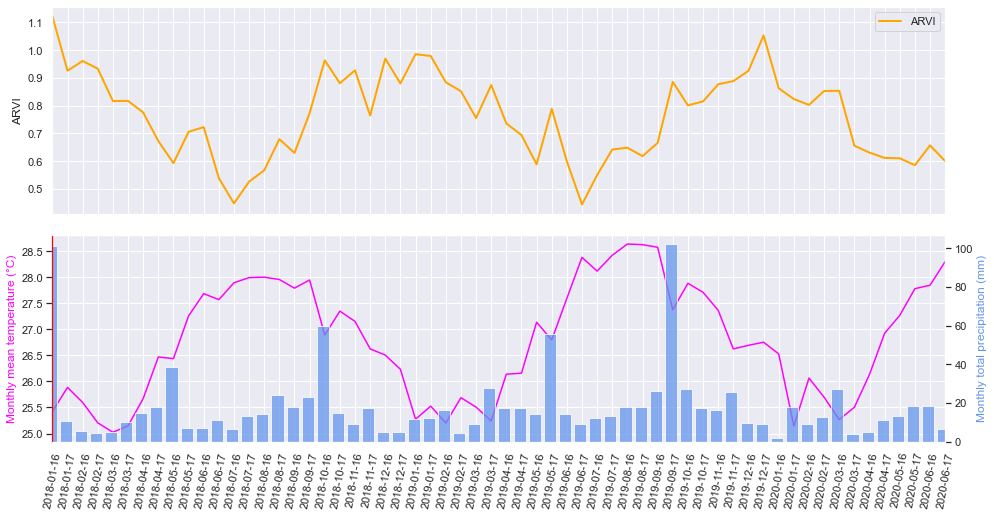

In [84]:
#Create the figure with a date x-axis
plt.style.use("tableau-colorblind10")
fig, [ax0, ax1] = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
#ax.set_xlim(dt.date(2017,12,1),dt.date(2020,2,1))
ax1.set_xlim(df.index.min(),df.index.max())
ax2 = ax1.twinx()

#plot ARVI
x_labels = list(grouped_arvi['date_intervals'])
x_pos = np.arange(len(x_labels))
ax0.plot(grouped_arvi['ARVI'], linewidth = 2, color = 'orange', label ='ARVI')
#ax0.plot(grouped_temperature['Temperature'],'-',color =temp_color,label = 'T (°C)')
#ax0.set_xticks(x_pos)
#ax0.set_xticklabels(x_labels, rotation = 80)
#ax0.set_xlabel(x_labels)
ax0.set_ylabel('ARVI',fontsize=12)
#ax0.set_title('ARVI, temperature and precipitations in Haiti for the period 2018-2020/half month time step',fontsize = 14)

#ax.set_ylabel('ARVI')
ax0.legend(loc = 'upper right')

dates_label = list(df['date_intervals'])
date_pos = np.arange(len(dates_label))
width = 0.25


ax2.grid(False)
p_prec = ax2.bar(date_pos - width/2, df['Precipitation'], alpha = .75, 
                 color = prec_color, label = 'precipitation(mm)')
#ax2.set_ylim(0, 5)

ax2.set_ylabel('Monthly total precipitation (mm)',fontsize = 12)
#ax2.spines['right'].set_color(prec_color)
#ax2.tick_params(axis='y', colors = prec_color)
ax2.yaxis.label.set_color(prec_color)
ax2.spines['left'].set_color(short_color)

#Plot temperature
p_temp = ax1.plot(grouped_temperature['Temperature'],'-',color =temp_color,label = 'T (°C)')
#ax1.tick_params(axis='y',colors = temp_color)
ax1.set_xticks(date_pos)
ax1.set_xticklabels(dates_label, rotation=80)
ax1.yaxis.label.set_color(temp_color)
ax1.set_ylabel('Monthly mean temperature (°C)', fontsize = 12)

ax.set_xlabel('Date',fontsize = 12)
plt.savefig('short_prec_halfmonth_haiti.png',dpi=250,bbox_inches = 'tight')

In [85]:
#grouped_arvi['date_intervals']

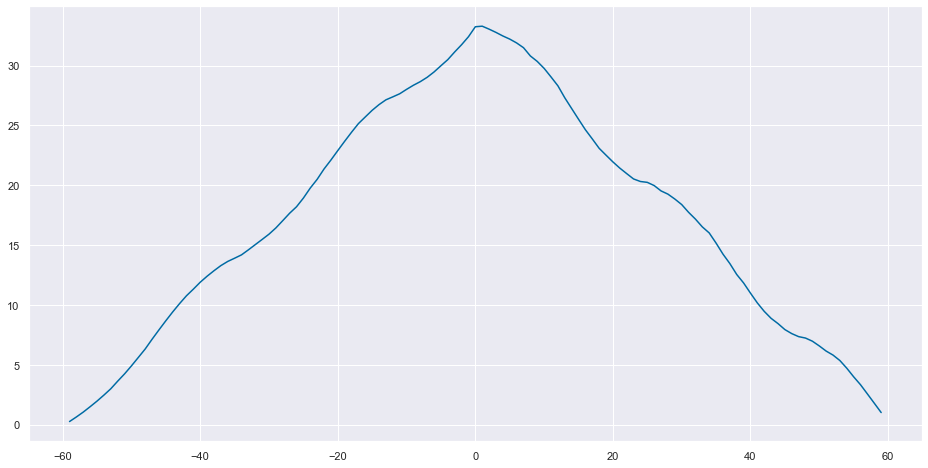

<Figure size 1152x576 with 0 Axes>

In [86]:

def plot_xcorr(x, y): 
    "Plot cross-correlation (full) between two signals."
    N = max(len(x), len(y)) 
    n = min(len(x), len(y)) 

    if N == len(x): 
        lags = np.arange(-N + 1, n) 
    else: 
        lags = np.arange(-n + 1, N) 
    c = correlate(x / np.std(x), y / np.std(y), 'full') 

    plt.plot(lags, c/n) 
    plt.show()
    plt.savefig('lagshort_halfmonth1.png',dpi=250,bbox_inches = 'tight')

shortwave_list =  np.array(grouped_shortwave["Shortwave"])
arvi_list = np.array(grouped_arvi["ARVI"])
plot_xcorr(shortwave_list, arvi_list) #Here you excecute it

In [87]:
#rng = np.random.RandomState(0)
#x = rng.standard_normal(1000)
#y = np.concatenate([rng.standard_normal(100), x])
#correlation = signal.correlate(grouped_arvi,grouped_shortwave, mode="full")
#lags = signal.correlation_lags(grouped_arvi.size, grouped_arvi.size, mode="full")
#lag = lags[np.argmax(correlation)]

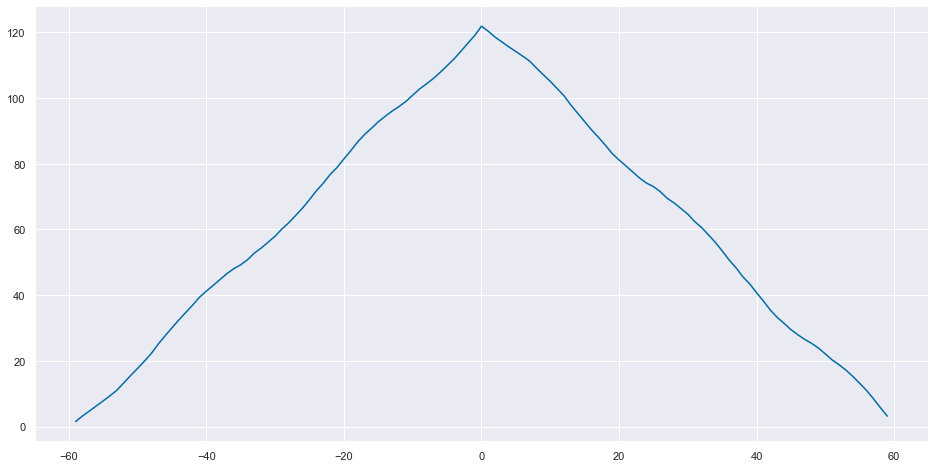

<Figure size 1152x576 with 0 Axes>

In [88]:
temp_list = np.array(grouped_temperature['Temperature'])
arvi_list = np.array(grouped_arvi["ARVI"])
plot_xcorr(temp_list, arvi_list) #Here you excecute it

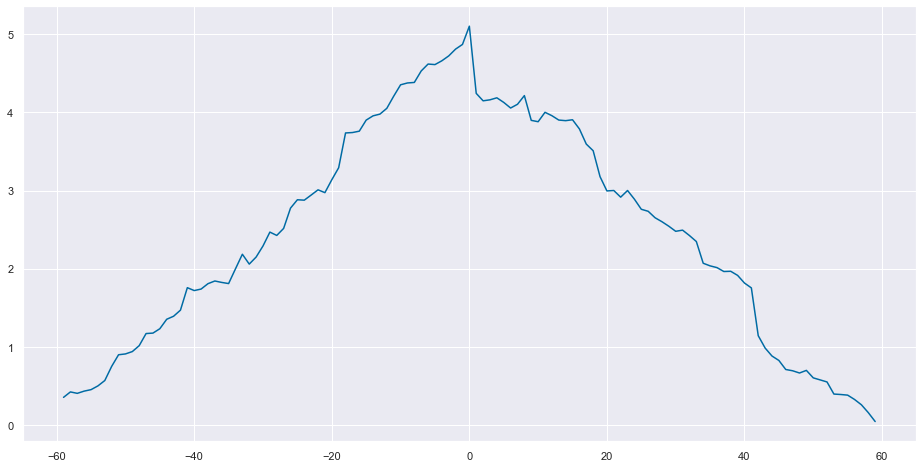

<Figure size 1152x576 with 0 Axes>

In [89]:
precip_list = np.array( df['Precipitation'])
arvi_list = np.array(grouped_arvi["ARVI"])
plot_xcorr(precip_list, arvi_list) #Here you excecute it

In [93]:
df.set_index(['date_intervals']).head()

,Temperature,Precipitation
date_intervals,,
2018-01-16,25.420467,101.022
2018-01-17,25.885800,10.441
2018-02-16,25.596733,5.737
2018-02-17,25.204833,4.729
2018-03-16,25.024267,4.971


In [97]:
# Copyright 2018, Tom Eulenfeld, MIT license
"""
Normalized cross-correlation or cross-correlation with specified maximum lag

This code is published in a similar version in ObsPy's
cross-correlation module (v1.1.0).
"""

import numpy as np
import scipy.signal


def _pad_zeros(a, num, num2=None):
    """Pad num zeros at both sides of array a"""
    if num2 is None:
        num2 = num
    hstack = [np.zeros(num, dtype=a.dtype), a, np.zeros(num2, dtype=a.dtype)]
    return np.hstack(hstack)


def _xcorr_padzeros(a, b, shift, method):
    """
    Cross-correlation using SciPy with mode='valid' and precedent zero padding
    """
    if shift is None:
        shift = (len(a) + len(b) - 1) // 2
    dif = len(a) - len(b) - 2 * shift
    if dif > 0:
        b = _pad_zeros(b, dif // 2)
    else:
        a = _pad_zeros(a, -dif // 2)
    return scipy.signal.correlate(a, b, 'valid', method)


def _xcorr_slice(a, b, shift, method):
    """
    Cross-correlation using SciPy with mode='full' and subsequent slicing
    """
    mid = (len(a) + len(b) - 1) // 2
    if shift is None:
        shift = mid
    if shift > mid:
        # Such a large shift is not possible without zero padding
        return _xcorr_padzeros(a, b, shift, method)
    cc = scipy.signal.correlate(a, b, 'full', method)
    return cc[mid - shift:mid + shift + len(cc) % 2]


def get_lags(cc):
    """
    Return array with lags

    :param cc: Cross-correlation returned by correlate_maxlag.
    :return: lags
    """
    mid = (len(cc) - 1) / 2
    if len(cc) % 2 == 1:
        mid = int(mid)
    return np.arange(len(cc)) - mid


def correlate_maxlag(a, b, maxlag, demean=True, normalize='naive',
                     method='auto'):
    """
    Cross-correlation of two signals up to a specified maximal lag.

    This function only allows 'naive' normalization with the overall
    standard deviations. This is a reasonable approximation for signals of
    similar length and a relatively small maxlag parameter.
    :func:`correlate_template` provides correct normalization.

    :param a,b: signals to correlate
    :param int maxlag: Number of samples to shift for cross correlation.
        The cross-correlation will consist of ``2*maxlag+1`` or
        ``2*maxlag`` samples. The sample with zero shift will be in the middle.
    :param bool demean: Demean data beforehand.
    :param normalize: Method for normalization of cross-correlation.
        One of ``'naive'`` or ``None``
        ``'naive'`` normalizes by the overall standard deviation.
        ``None`` does not normalize.
    :param method: correlation method to use.
        See :func:`scipy.signal.correlate`.

    :return: cross-correlation function.
    """
    a = np.asarray(a)
    b = np.asarray(b)
    if demean:
        a = a - np.mean(a)
        b = b - np.mean(b)
    # choose the usually faster xcorr function for each method
    _xcorr = _xcorr_padzeros if method == 'direct' else _xcorr_slice
    cc = _xcorr(a, b, maxlag, method)
    if normalize == 'naive':
        norm = (np.sum(a ** 2) * np.sum(b ** 2)) ** 0.5
        if norm <= np.finfo(float).eps:
            # norm is zero
            # => cross-correlation function will have only zeros
            cc[:] = 0
        elif cc.dtype == float:
            cc /= norm
        else:
            cc = cc / norm
    elif normalize is not None:
        raise ValueError("normalize has to be one of (None, 'naive'))")
    return cc


def _window_sum(data, window_len):
    """Rolling sum of data"""
    window_sum = np.cumsum(data)
    # in-place equivalent of
    # window_sum = window_sum[window_len:] - window_sum[:-window_len]
    # return window_sum
    np.subtract(window_sum[window_len:], window_sum[:-window_len],
                out=window_sum[:-window_len])
    return window_sum[:-window_len]


def correlate_template(data, template, mode='valid', demean=True,
                       normalize='full', method='auto'):
    """
    Normalized cross-correlation of two signals with specified mode.

    If you are interested only in a part of the cross-correlation function
    around zero shift use :func:`correlate_maxlag` which allows to
    explicetly specify the maximum lag.

    :param data,template: signals to correlate. Template array must be shorter
        than data array.
    :param normalize:
        One of ``'naive'``, ``'full'`` or ``None``.
        ``'full'`` normalizes every correlation properly,
        whereas ``'naive'`` normalizes by the overall standard deviations.
        ``None`` does not normalize.
    :param mode: correlation mode to use.
        See :func:`scipy.signal.correlate`.
    :param bool demean: Demean data beforehand.
        For ``normalize='full'`` data is demeaned in different windows
        for each correlation value.
    :param method: correlation method to use.
        See :func:`scipy.signal.correlate`.

    :return: cross-correlation function.

    .. note::
        Calling the function with ``demean=True, normalize='full'`` (default)
        returns the zero-normalized cross-correlation function.
        Calling the function with ``demean=False, normalize='full'``
        returns the normalized cross-correlation function.
    """
    data = np.asarray(data)
    template = np.asarray(template)
    lent = len(template)
    if len(data) < lent:
        raise ValueError('Data must not be shorter than template.')
    if demean:
        template = template - np.mean(template)
        if normalize != 'full':
            data = data - np.mean(data)
    cc = scipy.signal.correlate(data, template, mode, method)
    if normalize is not None:
        tnorm = np.sum(template ** 2)
        if normalize == 'naive':
            norm = (tnorm * np.sum(data ** 2)) ** 0.5
            if norm <= np.finfo(float).eps:
                cc[:] = 0
            elif cc.dtype == float:
                cc /= norm
            else:
                cc = cc / norm
        elif normalize == 'full':
            pad = len(cc) - len(data) + lent
            if mode == 'same':
                pad1, pad2 = (pad + 2) // 2, (pad - 1) // 2
            else:
                pad1, pad2 = (pad + 1) // 2, pad // 2
            data = _pad_zeros(data, pad1, pad2)
            # in-place equivalent of
            # if demean:
            #     norm = ((_window_sum(data ** 2, lent) -
            #              _window_sum(data, lent) ** 2 / lent) * tnorm) ** 0.5
            # else:
            #      norm = (_window_sum(data ** 2, lent) * tnorm) ** 0.5
            # cc = cc / norm
            if demean:
                norm = _window_sum(data, lent) ** 2
                if norm.dtype == float:
                    norm /= lent
                else:
                    norm = norm / lent
                np.subtract(_window_sum(data ** 2, lent), norm, out=norm)
            else:
                norm = _window_sum(data ** 2, lent)
            norm *= tnorm
            if norm.dtype == float:
                np.sqrt(norm, out=norm)
            else:
                norm = np.sqrt(norm)
            mask = norm <= np.finfo(float).eps
            if cc.dtype == float:
                cc[~mask] /= norm[~mask]
            else:
                cc = cc / norm
            cc[mask] = 0
        else:
            msg = "normalize has to be one of (None, 'naive', 'full')"
            raise ValueError(msg)
    return cc

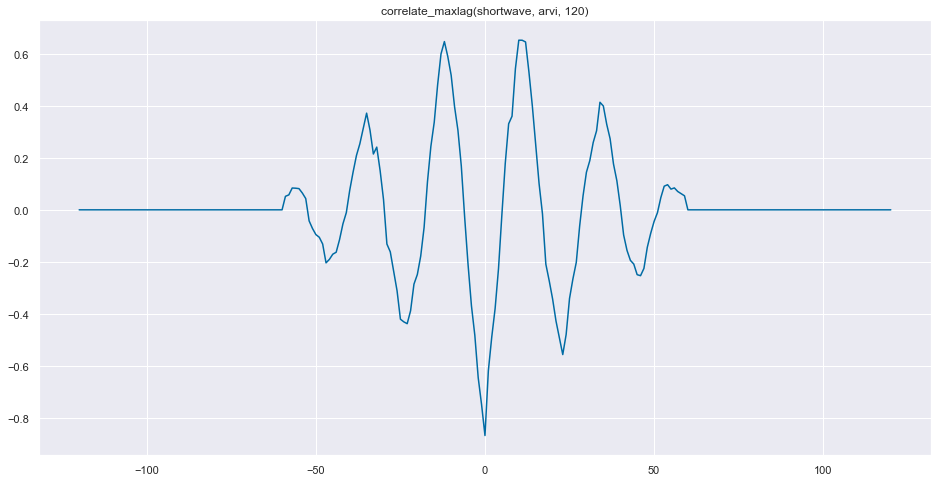

In [114]:
shortwave_list =  np.array(grouped_shortwave["Shortwave"])
arvi_list = np.array(grouped_arvi["ARVI"])

def _test():
    #import matplotlib.pyplot as plt

    #np.random.seed(42)
    N = len(shortwave_list)
    maxlag = 120
    a = shortwave_list
    start = N // 4
    b = arvi_list
    
    cc1 = correlate_maxlag(a, b, maxlag)
    cc2 = correlate_template(a, b)
    #print(cc2)

    #grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
    #ax1 = plt.subplot(grid[0, 0:])
    #ax2 = plt.subplot(grid[1, 0])
    #ax3 = plt.subplot(grid[1, 1], sharey=ax2)
    
    #plt.plot(np.arange(len(a)), a, label='Shortwave')
    #ax1.plot(np.arange(len(b)) + start, b, label='ARVI')
    plt.plot(get_lags(cc1), cc1)
    #ax3.plot(cc2)
    #plt.legend(loc=3)
    #kw = dict(xy=(0.05, 0.95), xycoords='axes fraction', va='top')
    #ax2.annotate('correlate_maxlag(shortwave, arvi, {})'.format(maxlag), **kw)
    #ax3.annotate('correlate_template(shortwave, arvi)', **kw)
    #plt.savefig('xcorr_example.png')
    plt.title('correlate_maxlag(shortwave, arvi, {})'.format(maxlag))
    plt.show()

#if __name__ == '__main__':
_test()